# Run the whole deltas algorithm

In [1]:
%load_ext autoreload
%autoreload 2

import ipywidgets
from deltas.pipeline import data, classifier, evaluation
from deltas.model import base, downsample
import deltas.plotting.plots as plots

## Get data

In [2]:
N1 = 1000
N2 = 10
m = 5
# Gaussian (not always seperable)
data_clf = data.get_data(
    m1=[-m, -m],
    m2=[m, m],
    cov1=[[1, 0], [0, 1]],
    cov2=[[1, 0], [0, 1]],
    N1=N1,
    N2=N2,
    scale=False
    )

## Get Classifier

original


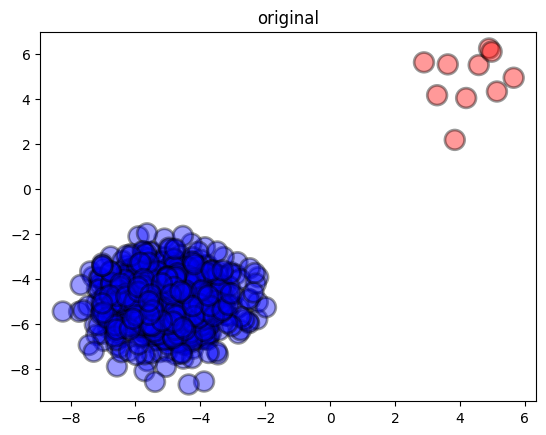

original


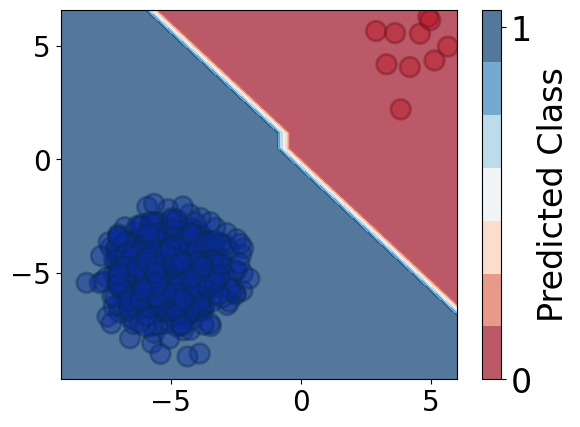

SMOTE


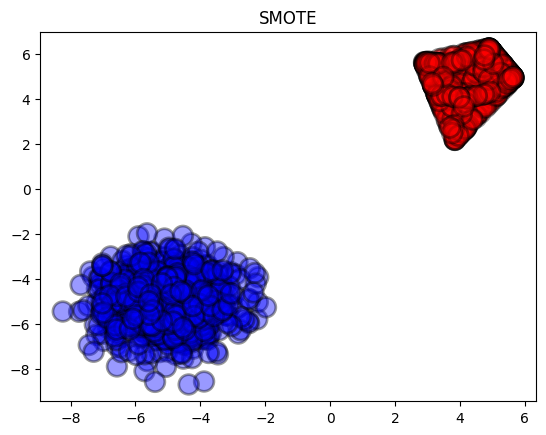

SMOTE


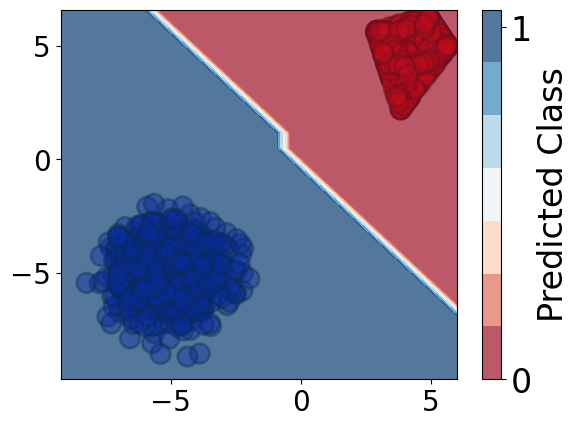

balanced_weights


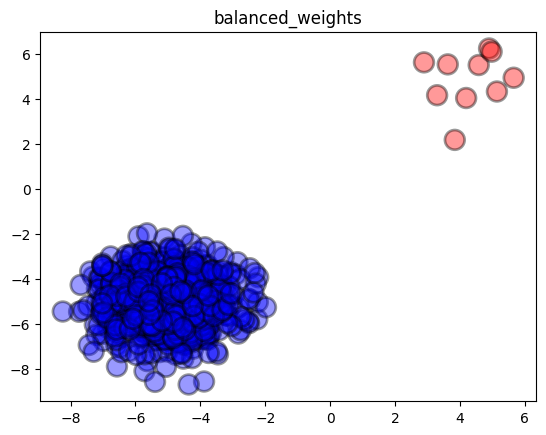

balanced_weights


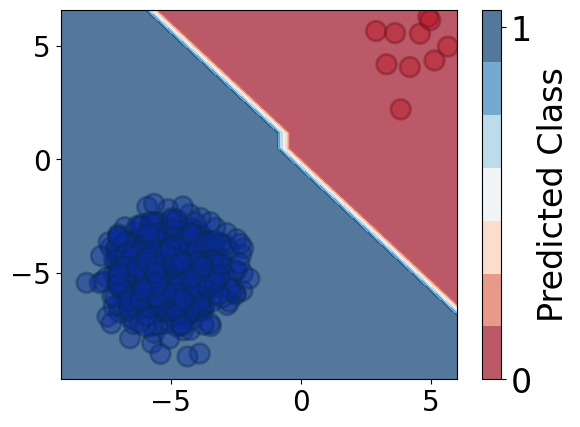

Bayes Minimum Risk


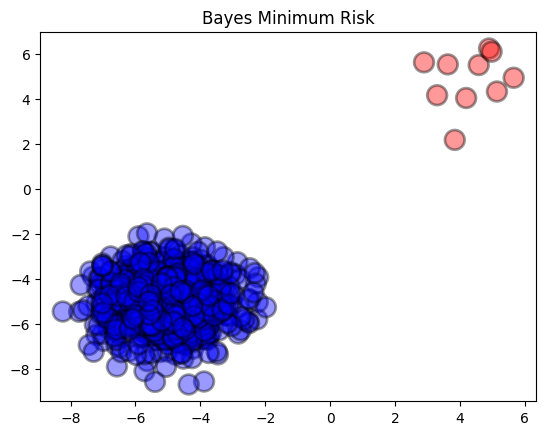

Bayes Minimum Risk


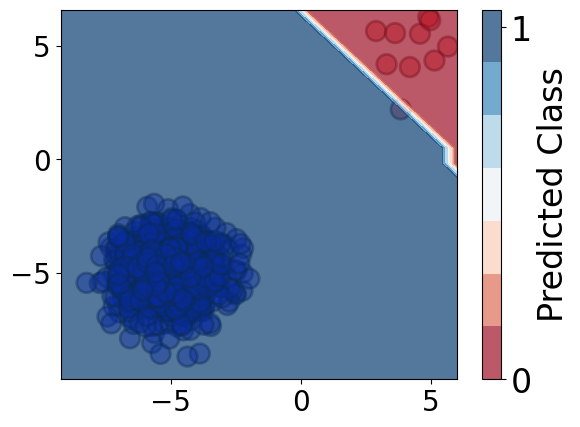

Bayes Minimum Risk (Not calibrated)


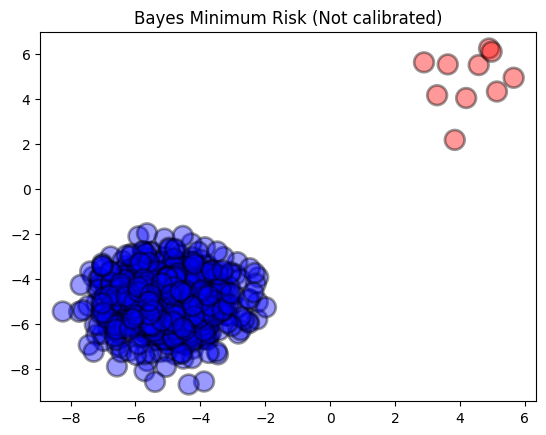

Bayes Minimum Risk (Not calibrated)


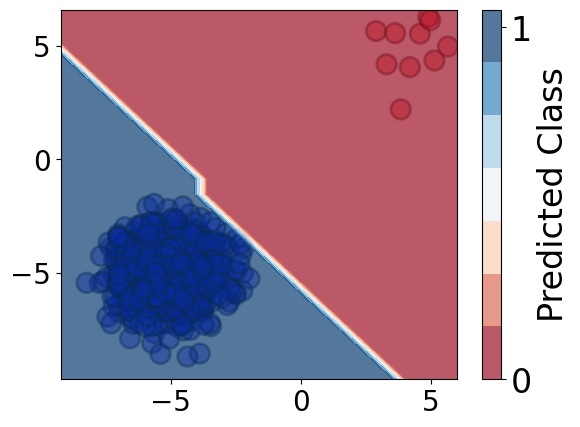

Thresholding


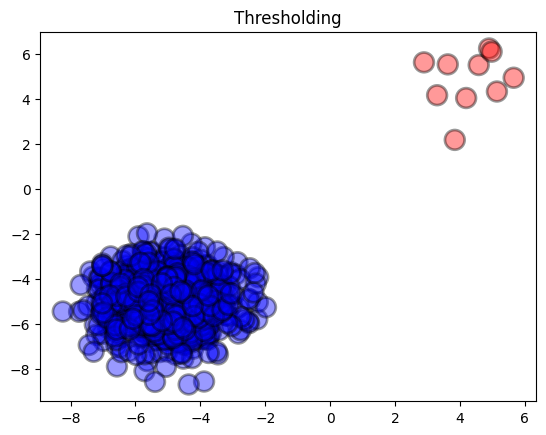

Thresholding


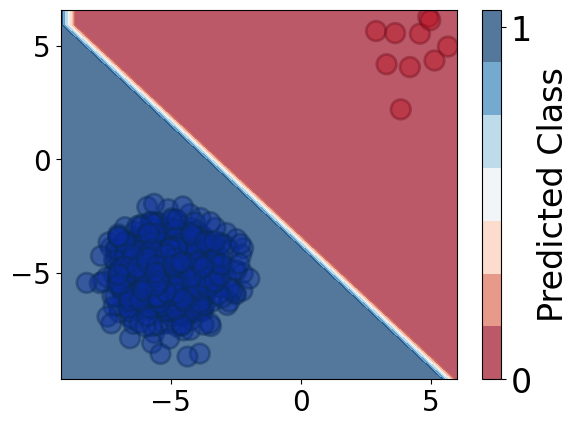

In [3]:
model = 'SVM-linear'
# model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
# balance_clf = False

classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf,
                      _plot_data=True)
data_clf['clf'] = classifiers_dict['Original']        

## Fit deltas

Original Data


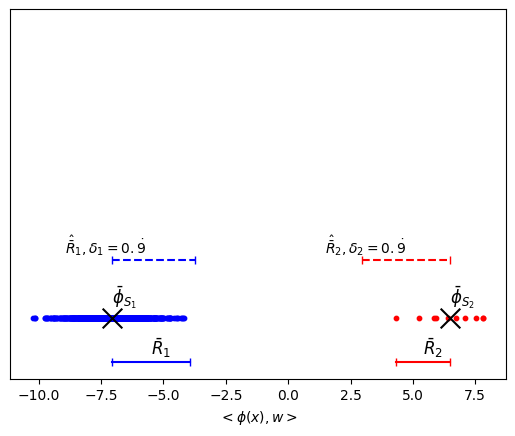

Original dataset is solvable so not downsampling, set 'force_downsample' to 'True' to try and find a lower loss via downsampling anyway
Original Data:


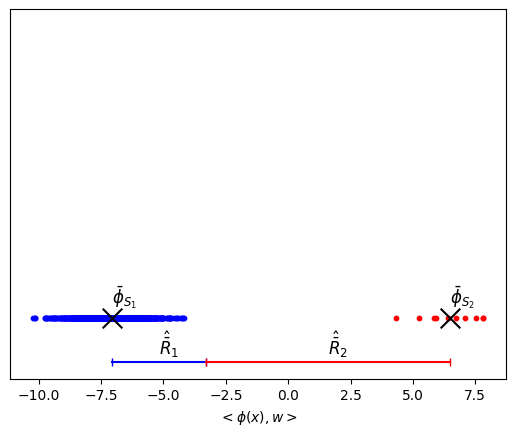

In [44]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
deltas_model = downsample.downsample_deltas(
    clf).fit(X, y, _print=True, _plot=True, grid_search=True)

## Plot training data information

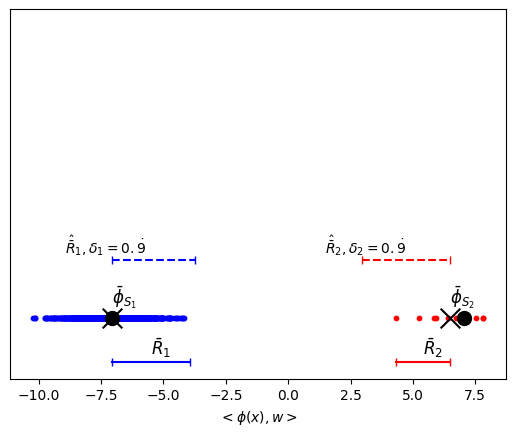

In [45]:
deltas_model.plot_data(data_clf)

## See how classifier's boudnary changes with delta

In [6]:
@ipywidgets.interact_manual(
    delta2=(0.00001, 1., 0.00001),
)
def plot(delta2=1):
    ax, _ = plots._get_axes(None)
    plots.plot_classes(data_clf['data'], ax=ax)
    def pred_func(X): return deltas_model._predict_given_delta2(X, delta2)
    plots.plot_decision_boundary_custom_pred(
        pred_func, data_clf['data'], ax=ax, probs=False)
    ax.set_title(f'delta_class0 = {delta2}')
    plots.plt.show()

interactive(children=(FloatSlider(value=1.0, description='delta2', max=1.0, min=1e-05, step=1e-05), Button(des…

## Show parameters

In [7]:
deltas_model.print_params()

Parameters
                R:  10.250522741078852
                N1: 1000
                N2: 10
                R1: 3.1660891312499047
                R2: 2.14934674435
                M:  8.511214544303614
                D:  13.555092764910018
                C1: 1
                C2: 1


# Evaluation on test data

                                     accuracy    G-Mean  ROC-AUC  \
Method                                                             
original                              1.00000  1.000000  1.00000   
SMOTE                                 1.00000  1.000000  1.00000   
balanced_weights                      1.00000  1.000000  1.00000   
Bayes Minimum Risk                    0.99835  0.998349  0.99835   
Bayes Minimum Risk (Not calibrated)   0.99980  0.999800  0.99980   
Thresholding                          1.00000  1.000000  1.00000   
deltas                                0.99995  0.999950  0.99995   

                                     precision1 (red)  precision2 (blue)  \
Method                                                                     
original                                     1.000000             1.0000   
SMOTE                                        1.000000             1.0000   
balanced_weights                             1.000000             1.0000   
Bayes M

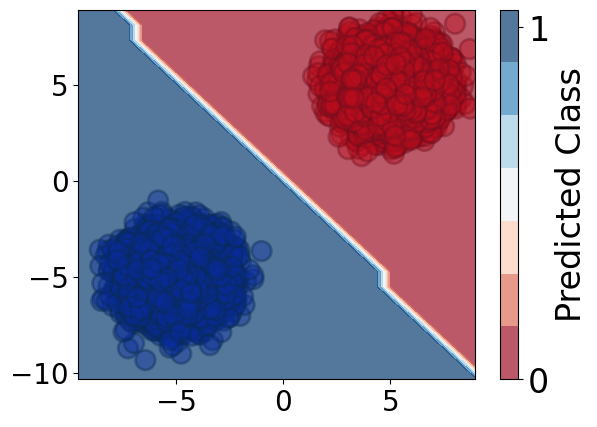

SMOTE


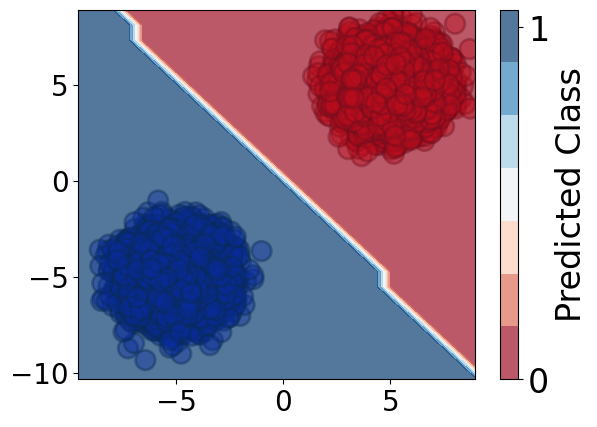

balanced_weights


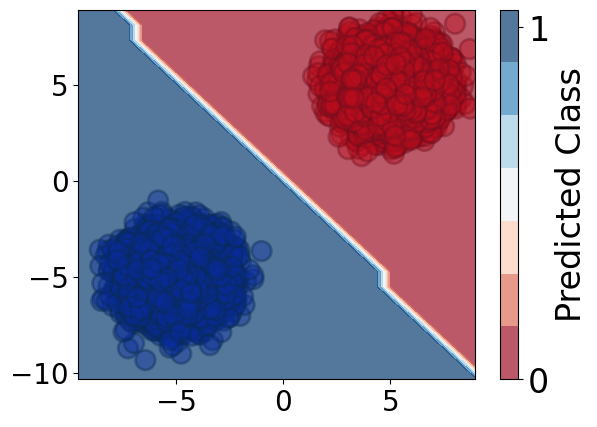

Bayes Minimum Risk


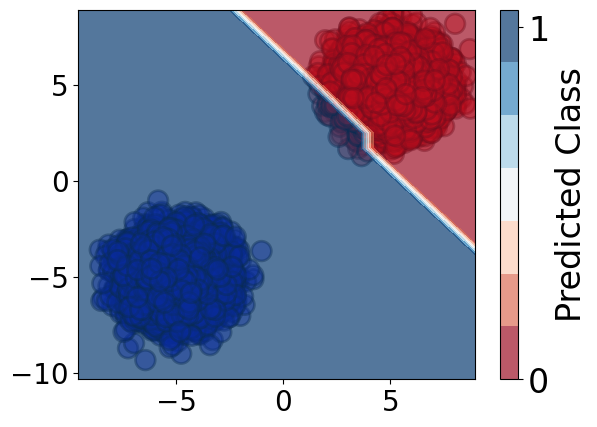

Bayes Minimum Risk (Not calibrated)


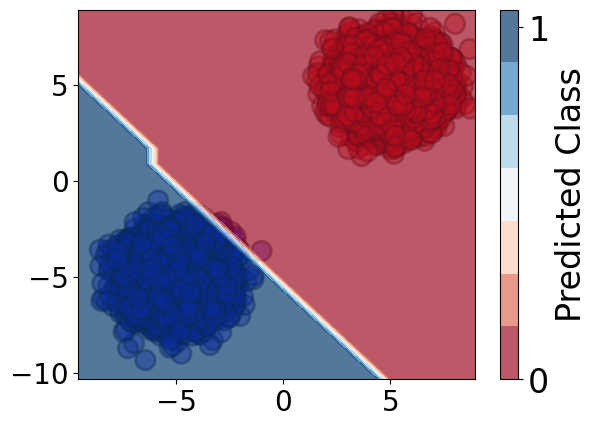

Thresholding


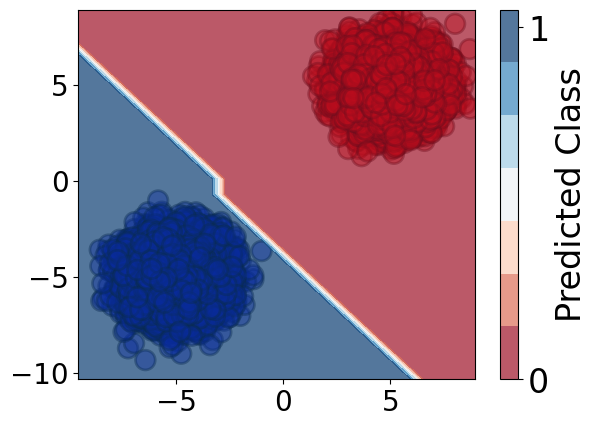

deltas


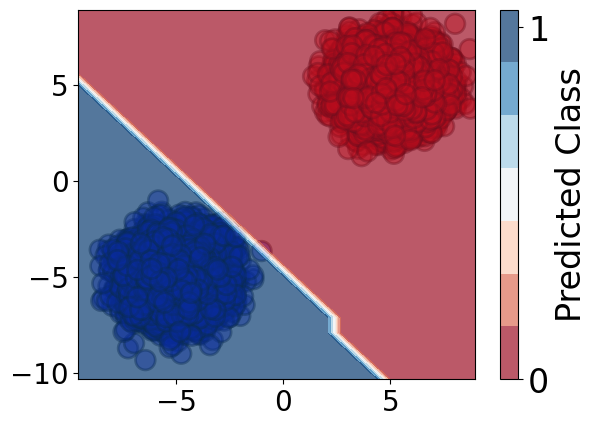

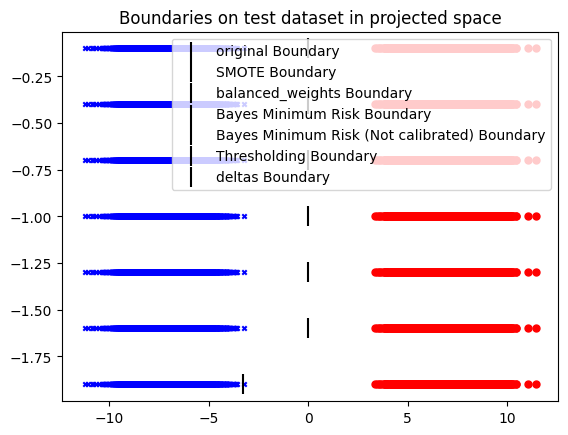

LATEX table format


\begin{tabular}{lrrrrrrrrl}
\toprule
 & accuracy & G-Mean & ROC-AUC & precision1 (red) & precision2 (blue) & precision & recall & F1 & F-score-1 \\
Method &  &  &  &  &  &  &  &  &  \\
\midrule
original & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & [1. 1.] \\
SMOTE & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & [1. 1.] \\
balanced_weights & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & [1. 1.] \\
Bayes Minimum Risk & 0.998350 & 0.998349 & 0.998350 & 0.996711 & 1.000000 & 0.996711 & 1.000000 & 0.998347 & [0.99835272 0.99834727] \\
Bayes Minimum Risk (Not calibrated) & 0.999800 & 0.999800 & 0.999800 & 1.000000 & 0.999600 & 1.000000 & 0.999600 & 0.999800 & [0.99979996 0.99980004] \\
Thresholding & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & [1. 1.] \\
deltas & 0.999950 & 0.999950 & 0.999950 & 1.000

,accuracy,G-Mean,ROC-AUC,precision1 (red),precision2 (blue),precision,recall,F1,F-score-1
Method,,,,,,,,,
original,1.00000,1.000000,1.00000,1.000000,1.0000,1.000000,1.0000,1.000000,"[1.0, 1.0]"
SMOTE,1.00000,1.000000,1.00000,1.000000,1.0000,1.000000,1.0000,1.000000,"[1.0, 1.0]"
balanced_weights,1.00000,1.000000,1.00000,1.000000,1.0000,1.000000,1.0000,1.000000,"[1.0, 1.0]"
Bayes Minimum Risk,0.99835,0.998349,0.99835,0.996711,1.0000,0.996711,1.0000,0.998347,"[0.9983527180152749, 0.9983472730004507]"
Bayes Minimum Risk (Not calibrated),0.99980,0.999800,0.99980,1.000000,0.9996,1.000000,0.9996,0.999800,"[0.9997999599919984, 0.9998000399920016]"
Thresholding,1.00000,1.000000,1.00000,1.000000,1.0000,1.000000,1.0000,1.000000,"[1.0, 1.0]"
deltas,0.99995,0.999950,0.99995,1.000000,0.9999,1.000000,0.9999,0.999950,"[0.999949997499875, 0.999950002499875]"


In [8]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict,
                       data_clf['data_test'], _print=True, _plot=True)